# Data Loading, Preparation, and Exploration

References:

[1] VanderPlas, Jake. *Python data science handbook: Essential tools for working with data. Second Edition* " O'Reilly Media, Inc.", 2023.

[2] McKinney, Wes. *Python for data analysis.* " O'Reilly Media, Inc.", 2022.

[3] Johansson, Robert, Robert Johansson, and Suresh John. *Numerical python.* Vol. 1. New York: Apress, 2019.

In [1]:
import numpy as np
import pandas as pd

## 1 Data Loading

Reading the data is most of the time, the first step in any data analysis. We also use a similar term *parsing* when we describe loading text data and interpreting it as tables and into different data types. In this notebook, we'll cover the basics of data loading using pandas.

### Reading `csv` files

Let's start with reading a small comma-separated values (CSV):

In [2]:
!cat data/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


Since this data is comma delimited, we can readily use `pandas.read_csv` to read and turn it into a `DataFrame`.

In [3]:
df = pd.read_csv('data/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Some files don't have a header (column label) row.

In [4]:
!cat data/ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In such cases, we can let pandas define a default integer columns,

In [5]:
pd.read_csv('data/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Or we can specify the names ourselves:

In [6]:
pd.read_csv('data/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In the above example, pandas creates a default integer index for each row of the data. If we want to let one of the columns in the csv become our index, we can specifically set it using the `index_col` parameter.

In [ ]:
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('data/ex2.csv', names=names, index_col='message')

Other files can also have other delimeters, using whitespace or other patterns to separate the fields.

In [7]:
!cat data/ex3.txt

A	B	C
aaa	0.2620246750155817	0.1586839721544656	0.27812651949435974
bbb	0.45931688721456665	0.32100054052016713	0.5183928205975371
ccc	0.26194292556514465	0.9760852848774336	0.7328145526904823
ddd	0.11527422668314946	0.38627506863435945	0.6285011795397116


In this case the file is separated by tabs. We can specify the delimeter used in the file using the `sep` or `delimiter` parameter.

In [8]:
pd.read_csv('data/ex3.txt', sep='\t')

,A,B,C
aaa,0.262025,0.158684,0.278127
bbb,0.459317,0.321001,0.518393
ccc,0.261943,0.976085,0.732815
ddd,0.115274,0.386275,0.628501


The `sep` parameter can also be specified using a regular expression syntax.

The file parsing function also has additional parameters which lets you handle a wide variety of exception file formats. For example, we can skip specific rows in the text file using the `skiprows` parameter.

In [9]:
!cat data/ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [10]:
pd.read_csv('data/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### Parsing null values

pandas also handles missing values automatically if it recognizes an empty string or a denoted *sentinel* (placeholder) value. By default, pandas uses a set of commonly occurring sentinels, such as `NA` and `NULL`:

In [11]:
!cat data/ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


Here are the list of the default null sentinels recognized by pandas:

In [12]:
pd._libs.parsers.STR_NA_VALUES

{'',
 '#N/A',
 '#N/A N/A',
 '#NA',
 '-1.#IND',
 '-1.#QNAN',
 '-NaN',
 '-nan',
 '1.#IND',
 '1.#QNAN',
 '<NA>',
 'N/A',
 'NA',
 'NULL',
 'NaN',
 'None',
 'n/a',
 'nan',
 'null'}

In [13]:
pd.read_csv('data/ex5.csv')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


We can use `pd.isna` to check which values in the dataframe are null (or `NaN`).

In [14]:
pd.isna(pd.read_csv('data/ex5.csv'))

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


If you want to disable the default sentinel values being used by pandas, you can specify the `keep_default_na` to be `False`.

In [15]:
pd.read_csv('data/ex5.csv', keep_default_na=False)

,something,a,b,c,d,message
0,one,1,2,3,4,NA
1,two,5,6,,8,world
2,three,9,10,11,12,foo


Then add using the `na_values` parameter the sentinel null values that you want to set as `NaN`.

In [16]:
pd.read_csv('data/ex5.csv', keep_default_na=False, na_values=['NA'])

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,two,5,6,,8,world
2,three,9,10,11,12,foo


You can also set different null sentinels for each column using a dictionary

In [17]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('data/ex5.csv', keep_default_na=False, na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,NaN,5,6,,8,world
2,three,9,10,11,12,NaN


### Reading text files in pieces

If we are given a large text file, pandas has ooptions avaiable to read it in smaller pieces.

In [19]:
df = pd.read_csv('data/ex6.csv')
df

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


We can read a small number of rows by specifying `nrows`

In [21]:
pd.read_csv('data/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


We can also read the file by chunk through specification of the `chunksize` parameter:

In [23]:
chunker = pd.read_csv('data/ex6.csv', chunksize=1000)
chunker

In [24]:
type(chunker)

pandas.io.parsers.readers.TextFileReader

This text file reader allows us to iterate the parts of the file according to the `chunksize`. For example, we can iterate to our data while aggregating the value counts in the `key` column.

In [25]:
# Create text file reader with specified chunksize
chunker = pd.read_csv('data/ex6.csv', chunksize=1000)

# Iterate on the chunker while aggregating the result container
total = pd.Series([], dtype='int64')
for piece in chunker:
    total = total.add(piece['key'].value_counts(), fill_value=0)

In [26]:
total

key
0    151.0
1    146.0
2    152.0
3    162.0
4    171.0
5    157.0
6    166.0
7    164.0
8    162.0
9    150.0
A    320.0
B    302.0
C    286.0
D    320.0
E    368.0
F    335.0
G    308.0
H    330.0
I    327.0
J    337.0
K    334.0
L    346.0
M    338.0
N    306.0
O    343.0
P    324.0
Q    340.0
R    318.0
S    308.0
T    304.0
U    326.0
V    328.0
W    305.0
X    364.0
Y    314.0
Z    288.0
dtype: float64

### Writing Data to a Text File

We can also export data to a delimited format.

In [27]:
data = pd.read_csv('data/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Using the `DataFrame`'s `to_csv` method, we can write the data to an output comma-separated file.

In [ ]:
data.to_csv('data/out.csv')

In [28]:
!cat data/out.csv

a,b,c
1,2,3.0
5,6,
9,10,11.0
1,2,3.0
5,6,
9,10,11.0


We can also use other delimiters by specifying the `sep` parameter

In [29]:
data.to_csv('data/out.csv', sep='|')

In [ ]:
!cat data/out.csv

Missing values appear as strings in the output, if we want to denote null values using other sentinel value, we can set the `na_rep` parameter.

In [30]:
data.to_csv('data/out.csv', na_rep='NULL')

In [31]:
!cat data/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


We can also opt to not include the row and column index by specifying the `index` and `header` parameter respectively.

In [32]:
data.to_csv('data/out.csv', index=False, header=False)

In [33]:
!cat data/out.csv

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


We can also write a subset of columns in the order of your choosing

In [34]:
data.to_csv('data/out.csv', index=False, columns=['a', 'b', 'c'])

In [35]:
!cat data/out.csv

a,b,c
1,2,3.0
5,6,
9,10,11.0


We can set the write `mode` parameter if we want to instead append values to the text file.

In [36]:
data.to_csv('data/out.csv', index=False, columns=['a', 'b', 'c'], mode='a',
            header=False)

In [37]:
!cat data/out.csv

a,b,c
1,2,3.0
5,6,
9,10,11.0
1,2,3.0
5,6,
9,10,11.0


### Binary Data Formats

We can also serialize a data frame in `pickle` format using pandas built in `to_pickle` method.

In [38]:
df = pd.read_csv('data/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [39]:
df.to_pickle('data/df.pickle')

Pickle files are generally readable only in Python. You can read any "pickled" object stored in a file using the `pickle` module.

In [40]:
import pickle

In [41]:
with open('data/df.pickle', 'rb') as f:
    pickled_df = pickle.load(f)
pickled_df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Or conveniently using the `pd.read_pickle` function:

In [42]:
pd.read_pickle('data/df.pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## 2 Data Preparation

In any data science project, the data preparation: loading, cleaning, transforming, and rearranging takes up 80% of time. Here we explore data preparation methods that is readily available to us in pandas.

### Handling Missing Data

For data with `float64` dtype, pandas using a floating-point value `NaN` to represent missing data.

In [43]:
float_data = pd.Series([1.2, -3.5, np.nan, None, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    NaN
4    0.0
dtype: float64

Notice that both the numpy `nan` value and `None` is recognized by pandas as null values.

In [44]:
float_data.isna()

0    False
1    False
2     True
3     True
4    False
dtype: bool

#### Filtering Out Missing Data

There are few ways in which we can filter missing data.

In [45]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

We can use the `dropna` method.

In [46]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

Or index not null values.

In [47]:
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

With `DataFrame`s, you may want to drop rows or columns that are all null, or only those rows containing any null values. `dropna` by default drops any row containing a missing value.

In [48]:
data = pd.DataFrame([[1., 6.5, 6.],
                     [2., np.nan, np.nan],
                     [np.nan, np.nan, np.nan],
                     [np.nan, 7.5, 3.]])
data

,0,1,2
0,1.0,6.5,6.0
1,2.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,7.5,3.0


In [49]:
data.dropna()

,0,1,2
0,1.0,6.5,6.0


To drop only rows that are all nulls, we specify the `all` to the `how` parameter.

In [50]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,6.0
1,2.0,NaN,NaN
3,NaN,7.5,3.0


To drop with respect to the columns instead, we specify the `axis` parameter.

In [51]:
data.dropna(axis='columns')

""
0
1
2
3


In [ ]:
data[4] = np.nan
data

In [ ]:
data.dropna(axis=1, how='all')

If we want to keep only rows containing at most a certain number of missing observations. We can indicate this using the `thresh` argument.

In [52]:
data

,0,1,2
0,1.0,6.5,6.0
1,2.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,7.5,3.0


In [53]:
data.dropna(thresh=2)

,0,1,2
0,1.0,6.5,6.0
3,NaN,7.5,3.0


#### Filling In Missing Data

Rather than filtering out missing data, we may want to fill the null values in a number of ways. For most cases, the `fillna` method allows us to use a constant to replace missing values.

In [54]:
data.fillna(-10)

,0,1,2
0,1.0,6.5,6.0
1,2.0,-10.0,-10.0
2,-10.0,-10.0,-10.0
3,-10.0,7.5,3.0


We can also use a dictionary to specify null values for each column.

In [55]:
data.fillna({0: -10, 1: -100, 2: -1_000, 4: -10_000})

,0,1,2
0,1.0,6.5,6.0
1,2.0,-100.0,-1000.0
2,-10.0,-100.0,-1000.0
3,-10.0,7.5,3.0


We can also do the forward filling and backfilling method which we encountered in the previous notebook.

In [56]:
data.fillna(method='ffill')

/tmp/ipykernel_9752/1844443866.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill')


,0,1,2
0,1.0,6.5,6.0
1,2.0,6.5,6.0
2,2.0,6.5,6.0
3,2.0,7.5,3.0


In [57]:
data.fillna(method='bfill')

/tmp/ipykernel_9752/1397359497.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill')


,0,1,2
0,1.0,6.5,6.0
1,2.0,7.5,3.0
2,NaN,7.5,3.0
3,NaN,7.5,3.0


One of the common ways of imputing a value in the data is to use the mean value of that column.

In [58]:
data.fillna(data.mean())

,0,1,2
0,1.0,6.5,6.0
1,2.0,7.0,4.5
2,1.5,7.0,4.5
3,1.5,7.5,3.0


### Data Transformation

#### Removing Duplicates

Given a data with duplicates,

In [59]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


We can first determine which rows are duplicates of one another using the `duplicated` method.

In [60]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Or drop them directly using the `drop_duplicates` method.

In [61]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


Both by default consider both columns. Alternatively, we can specify any subset to drop duplicated rows across that subset.

In [62]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [63]:
data.drop_duplicates(subset=['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


By default, the first occurrence is being retained. Passing `last` to the `keep` parameter will return the last one.

In [64]:
data.drop_duplicates(subset=['k1'], keep='last')

,k1,k2,v1
4,one,3,4
6,two,4,6


#### Transforming Data Using a Function or Mapping

We can also perform some transformation based on values in an array, Series, or a column in the dataframe. Consider the following hypothetical data collected about various kind of meat:

In [65]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                              "pastrami", "corned beef", "bacon",
                              "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Suppose we want to add a column indicating the type of animal that each food came from. We can do this by defining a mapping between each distinct meat type to the kind of animal.

In [67]:
meat_to_animal = {
"bacon": "pig",
"pulled pork": "pig",
"pastrami": "cow",
"corned beef": "cow",
"honey ham": "pig",
"nova lox": "salmon"
}

In [ ]:
data['animal'] = data['food'].map(meat_to_animal)
data

Alternatively, we can use a function to perform and transform the values of the data frame. For example, we want to convert the ounce values to kilograms, we can define the conversion:

In [68]:
ounces_to_kg = lambda x: 0.0283495*x

In [69]:
data['kg'] = data.ounces.apply(ounces_to_kg)
data

,food,ounces,kg
0,bacon,4.0,0.113398
1,pulled pork,3.0,0.085048
2,bacon,12.0,0.340194
3,pastrami,6.0,0.170097
4,corned beef,7.5,0.212621
5,bacon,8.0,0.226796
6,pastrami,3.0,0.085048
7,honey ham,5.0,0.141747
8,nova lox,6.0,0.170097


#### Replacing Values

We can also replace specific values using the `replace` method.

In [70]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

We can specify this in various ways

In [71]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [72]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [73]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [74]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

#### Renaming Axis Indexes

Axis labels can also be trasnforemed by a funciton or mapping to produce new, differently labeled objects.

In [75]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=["Ohio", "Colorado", "New York"],
                    columns=["one", "two", "three", "four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


We can assign the `index` of a data frame to modify it in place.

In [76]:
data.index = data.index.map(lambda x: x[:4].upper())
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


If we want to create a transformed version without modifying the original, we can use the `rename` method.

In [77]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


We can also specify a dictionary instead of a function

In [78]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


#### Discretization and Binning

Continuous data is often discretized or separated into "bins" for analysis. For example, we have data about age of a population and you want to group them into a discrete age buckets:

In [79]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]

In [80]:
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

The result is a special `Categorical` object. Each bin is identified by a special (unique to pandas) interval value type containing the lower and upper limit of each bin.

In [81]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [82]:
age_categories.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [83]:
age_categories.categories[0]

Interval(18, 25, closed='right')

We can specify which side is closed by passing the `right` argument.

In [84]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

You can override the default interval-based labeling by passing a list or array to the `labels` parameter.

In [85]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

If you pass an integer number of bins to `pandas.cut` it will compute an equal-length bin based on the minimum and maximum values in the data.

In [86]:
data = np.random.uniform(size=20)
pd.cut(data, 4, precision=2)

[(0.03, 0.25], (0.47, 0.69], (0.47, 0.69], (0.47, 0.69], (0.25, 0.47], ..., (0.25, 0.47], (0.69, 0.92], (0.03, 0.25], (0.69, 0.92], (0.03, 0.25]]
Length: 20
Categories (4, interval[float64, right]): [(0.03, 0.25] < (0.25, 0.47] < (0.47, 0.69] < (0.69, 0.92]]

`precision` specifies the decimal precision of the output.

A closely related function is `pd.qcut` which bins the data based on sample quantiles.

In [87]:
data = np.random.standard_normal(1_000)
quartiles = pd.qcut(data, 4, precision=2)
quartiles

[(0.0051, 0.65], (-3.44, -0.65], (0.0051, 0.65], (0.0051, 0.65], (-3.44, -0.65], ..., (-3.44, -0.65], (-0.65, 0.0051], (0.0051, 0.65], (-3.44, -0.65], (0.65, 3.14]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.44, -0.65] < (-0.65, 0.0051] < (0.0051, 0.65] < (0.65, 3.14]]

In [88]:
pd.value_counts(quartiles)

/tmp/ipykernel_9752/3472704981.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(quartiles)


(-3.44, -0.65]     250
(-0.65, 0.0051]    250
(0.0051, 0.65]     250
(0.65, 3.14]       250
Name: count, dtype: int64

#### Detecting and Filtering Outliers

Filtering or transforming outliers is largely a matter of applying array operations. Suppose give a data,

In [89]:
data = pd.DataFrame(np.random.standard_normal((1_000, 4)))
data

,0,1,2,3
0,0.848969,0.981806,0.654130,1.099719
1,-0.114630,0.014211,-1.145742,-0.224144
2,-0.317803,-0.042770,1.902723,-1.389616
3,0.732638,-0.033934,-0.516936,0.593197
4,-1.102164,-1.301378,-0.603394,-0.036778
...,...,...,...,...
995,0.097239,-0.238722,0.666807,-0.324862
996,0.072263,1.090159,0.507722,-0.229733
997,0.258584,-0.051439,-0.196572,-1.125501
998,0.745356,-0.428800,-0.950776,0.146918


We want to retain only those within 3 sigma of the mean

$$
x = \mu \pm 3 \sigma
$$

We can use a combination of boolean array operations to determine which values are outliers.

In [90]:
outliers_mask = data > data.mean() + 3*data.std()
outliers_mask |= data < data.mean() - 3*data.std()

In [91]:
outliers_mask.sum()

0    4
1    2
2    5
3    2
dtype: int64

To select the rows having values that exceeds our outlier condition, we can use  the `any` method on a Boolean DataFrame.

In [92]:
data[outliers_mask.any(axis='columns')]

,0,1,2,3
24,0.207337,-3.491151,-0.814575,-1.189292
134,0.660915,1.516386,0.883116,-3.041491
232,-0.416948,0.807951,3.209824,-0.793577
392,-0.651799,-0.127201,-3.215166,-0.998420
400,0.292040,-0.352969,-0.289823,3.089900
494,1.092180,-1.942565,-3.433268,0.460790
532,-2.979465,-1.529858,0.196386,0.478082
541,-1.764922,1.312320,3.357646,-0.050806
581,-3.185207,-0.299460,-0.039845,0.376864
595,1.574931,-3.078882,-0.674606,1.031265


#### Permutation and Random Sampling

Permuting (randomly reordering) a Series or DataFrame is possible using the `np.random.permutation` function. Afterwards, we can use fancy indexing or the `take` method to get the permuted data.

In [93]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [94]:
np.random.seed(1337)
sampler = np.random.permutation(df.shape[0])
sampler

array([3, 2, 1, 0, 4])

In [95]:
df.iloc[sampler]

,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34


In [96]:
df.take(sampler)

,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34


We can also permute the columns by specifying the `axis` parameter.

In [97]:
np.random.seed(1337)
column_sampler = np.random.permutation(df.shape[1])
df.take(column_sampler, axis='columns')

,6,2,1,3,0,4,5
0,6,2,1,3,0,4,5
1,13,9,8,10,7,11,12
2,20,16,15,17,14,18,19
3,27,23,22,24,21,25,26
4,34,30,29,31,28,32,33


### String Manipulation

pandas incorporates the usual built-in python string operations as a methods operating on a Series. Here is a partial list of those methods.

<img src="images/string.png" style="width: 65%;">

We will demonstrate a few of those using this sample data.

In [98]:
data = {"Dave": "dave@google.com", "Steve": "steve@gmail.com",
        "Rob": "rob@gmail.com", "Wes": np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [99]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [100]:
data.str.split('@')

Dave     [dave, google.com]
Steve    [steve, gmail.com]
Rob        [rob, gmail.com]
Wes                     NaN
dtype: object

In [101]:
data.str.split('@').str.join('#')

Dave     dave#google.com
Steve    steve#gmail.com
Rob        rob#gmail.com
Wes                  NaN
dtype: object

In [102]:
data.str.split('@').str[0]

Dave      dave
Steve    steve
Rob        rob
Wes        NaN
dtype: object

## Data Exploration

pandas object are also equipped with a set of common mathematical and statistical methods that allow for reduction or summarization of a dataset.

Say we are given with the following dataset:

In [103]:
data = pd.read_csv(
    'data/2022-2023_nba_regular.csv', sep=';', encoding = 'ISO-8859-1',
).drop_duplicates(subset='Rk').set_index('Rk')
data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4


### Summary Statistics

We can use the `describe` method to give a summary statistics for chosen columns:

In [104]:
data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [105]:
columns = ['AST', 'STL', 'BLK', 'TOV', '3P', 'PTS']
data.loc[:, columns].describe()

,AST,STL,BLK,TOV,3P,PTS
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,2.068646,0.609647,0.382189,1.103711,0.990353,9.120965
std,1.933254,0.398533,0.384478,0.826909,0.872600,6.842576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.800000,0.300000,0.100000,0.500000,0.300000,4.150000
50%,1.400000,0.600000,0.300000,0.900000,0.800000,7.000000
75%,2.750000,0.800000,0.500000,1.500000,1.500000,12.100000
max,10.700000,3.000000,3.000000,4.100000,4.900000,33.100000


We can reduce the dataset using common summary statistics and related methods.

In [106]:
data.loc[:, columns].median()

AST    1.4
STL    0.6
BLK    0.3
TOV    0.9
3P     0.8
PTS    7.0
dtype: float64

In [107]:
data.loc[:, columns].max()

AST    10.7
STL     3.0
BLK     3.0
TOV     4.1
3P      4.9
PTS    33.1
dtype: float64

In [108]:
data.loc[:, columns].min()

AST    0.0
STL    0.0
BLK    0.0
TOV    0.0
3P     0.0
PTS    0.0
dtype: float64

### Correlation and Covariance

You can also compute the correlation per series or per data frame

In [109]:
data['3P'].corr(data.TOV)

0.5345685244802239

In [110]:
data.loc[:, columns].corr()

,AST,STL,BLK,TOV,3P,PTS
AST,1.000000,0.652705,0.090322,0.831608,0.532157,0.722145
STL,0.652705,1.000000,0.201885,0.567522,0.457042,0.581854
BLK,0.090322,0.201885,1.000000,0.277386,-0.030098,0.327573
TOV,0.831608,0.567522,0.277386,1.000000,0.534569,0.852181
3P,0.532157,0.457042,-0.030098,0.534569,1.000000,0.702794
PTS,0.722145,0.581854,0.327573,0.852181,0.702794,1.000000


In [111]:
data.loc[:, columns].cov()

,AST,STL,BLK,TOV,3P,PTS
AST,3.737472,0.502887,0.067136,1.329429,0.897727,9.552852
STL,0.502887,0.158829,0.030934,0.187027,0.158941,1.586712
BLK,0.067136,0.030934,0.147823,0.088189,-0.010098,0.861787
TOV,1.329429,0.187027,0.088189,0.683778,0.385724,4.821799
3P,0.897727,0.158941,-0.010098,0.385724,0.761431,4.196262
PTS,9.552852,1.586712,0.861787,4.821799,4.196262,46.820842


### Unique Values, Value Counts, and Membership

Another class of method extracts information about the unique values contained in a Series or DataFrame. For example, we want to get the unique positions in NBA, we can use the `unique` method.

In [112]:
data.Pos.unique()

array(['C', 'SG', 'PF', 'PG', 'SF', 'PF-SF', 'SF-SG', 'SG-PG'],
      dtype=object)

A very common operation is to compute the frequency counts of a specific variable. For example, if we want to compute the frequency counts of the age in our dataset, we can:

In [113]:
age_counts = data.Age.value_counts().sort_index()
age_counts

Age
19    14
20    30
21    41
22    47
23    64
24    53
25    52
26    39
27    38
28    26
29    26
30    29
31    16
32    19
33    11
34    15
35     5
36     8
37     3
38     1
39     1
42     1
Name: count, dtype: int64

We can also generate a frequency plot count using this data.

In [114]:
import matplotlib.pyplot as plt

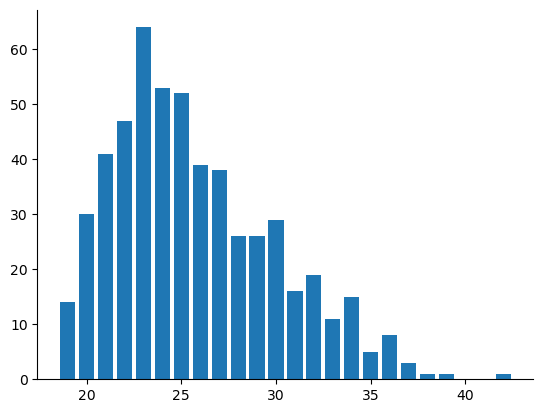

In [115]:
fig, ax = plt.subplots()

ax.bar(age_counts.index, age_counts)
ax.spines[['top', 'right']].set_visible(False)

More visualization options will be discussed in the 

## 4 Supplemental Exercises

For additional exercises, check the following resources:

1. https://codesolid.com/pandas-practice-examples/#part-two-pandas-review-questions
2. https://www.practiceprobs.com/problemsets/python-pandas/
3. https://www.w3resource.com/python-exercises/pandas/index.php